MILESTONE 1

* Nama : Masayu Anandita Prameswari
* Batch : RMT-026


Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.


Link Dashboard : https://public.tableau.com/app/profile/masayu.anandita/viz/FizzareBikesSalesReport2015-2016/Dashboard1

# 1. Identifikasi Masalah

Problem Statement :How was the sales performance of Fezzari bikes products in the 2015-2016 period.

1. What products sell the most? ?
2. What was the best month for sales in 2015 and 2016? ?
3. Which country provide the greatest profit and the lowest profit?
4. Does the customer's gender have a correlation with the payment method used ? ?
5. Which age people have bought more products? ?
6. How is Customer Satisfaction towards the product ?

# 2. Data Loading

Data Source : https://www.kaggle.com/datasets/nivethithaamurugan/bike-accessories-sales-dataset/data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#display dataset
df = pd.read_excel(os.path.join('/content/drive/MyDrive/Hactiv8/Sales.xlsx'))
df

,Unnamed: 0,Date,Time,Year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Revenue,Payment,Rating,Month,Sales Cost,Hour
0,0,02-19-16,13:08,2016,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109,Credit Card,6.5,2,80.00,13
1,1,2-20-16,10:29,2016,29,F,United States,Washington,Clothing,Gloves,2,24.50,57,Credit Card,5.0,2,49.00,10
2,2,2-27-16,13:23,2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,15,Cash,7.5,2,11.01,13
3,3,12-03-2016,20:33,2016,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,233,Cash,6.5,12,175.00,20
4,4,12-03-2016,10:37,2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,125,Cash,8.0,12,105.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34848,34860,2-24-16,13:24,2016,37,M,Germany,Bayern,Bikes,Mountain Bikes,2,384.50,1072,Cash,7.0,2,769.00,13
34849,34861,3-22-15,18:06,2015,38,M,France,Charente-Maritime,Bikes,Mountain Bikes,1,2049.00,1487,Cash,9.0,3,2049.00,18
34850,34863,3-13-15,11:42,2015,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,1,2049.00,1583,Cash,9.5,3,2049.00,11
34851,34864,05-04-2015,14:30,2015,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,3,683.00,1682,Cash,7.0,5,2049.00,14


In [4]:
#show columns in dataset
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Year', 'Customer Age', 'Customer Gender',
       'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
       'Unit Cost', 'Revenue', 'Payment', 'Rating', 'Month', 'Sales Cost',
       'Hour'],
      dtype='object')

In [5]:
#show information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34853 entries, 0 to 34852
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        34853 non-null  int64  
 1   Date              34853 non-null  object 
 2   Time              34853 non-null  object 
 3   Year              34853 non-null  int64  
 4   Customer Age      34853 non-null  int64  
 5   Customer Gender   34853 non-null  object 
 6   Country           34853 non-null  object 
 7   State             34853 non-null  object 
 8   Product Category  34853 non-null  object 
 9   Sub Category      34853 non-null  object 
 10  Quantity          34853 non-null  int64  
 11  Unit Cost         34853 non-null  float64
 12  Revenue           34853 non-null  int64  
 13  Payment           34853 non-null  object 
 14  Rating            34853 non-null  float64
 15  Month             34853 non-null  int64  
 16  Sales Cost        34853 non-null  float6

In [6]:
#see description of the data
df.describe()

,Unnamed: 0,Year,Customer Age,Quantity,Unit Cost,Revenue,Rating,Month,Sales Cost,Hour
count,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000
mean,17437.967836,2015.569277,36.384902,2.002496,349.886978,640.863340,7.491177,6.391788,575.964451,14.911170
std,10061.394631,0.495185,11.111604,0.813929,490.055370,736.644793,1.578697,3.449814,690.432584,3.185335
min,0.000000,2015.000000,17.000000,1.000000,0.670000,2.000000,5.000000,1.000000,2.000000,10.000000
25%,8725.000000,2015.000000,28.000000,1.000000,45.000000,102.000000,6.000000,3.000000,85.000000,12.000000
50%,17438.000000,2016.000000,35.000000,2.000000,150.000000,319.000000,7.500000,6.000000,261.000000,15.000000
75%,26151.000000,2016.000000,44.000000,3.000000,455.000000,902.000000,9.000000,9.000000,769.000000,18.000000
max,34865.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,10.000000,12.000000,3600.000000,20.000000


# 3. Data Cleaning

###Cek missing value

In [7]:
df.isna().sum()

Unnamed: 0          0
Date                0
Time                0
Year                0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Revenue             0
Payment             0
Rating              0
Month               0
Sales Cost          0
Hour                0
dtype: int64

Insight : There is no missing values in dataset

##Rename some column

In [8]:
df.rename(columns = {'Customer Age' : 'Customer_Age', 'Customer Gender' : 'Customer_Gender' , 'Product Category' : 'Product_Category',
                    'Sub Category' : 'Sub_Category', 'Unit Cost'  : 'Unit_Cost', 'Sales Cost' : 'Sales_Cost'}, inplace=True)
df

,Unnamed: 0,Date,Time,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Quantity,Unit_Cost,Revenue,Payment,Rating,Month,Sales_Cost,Hour
0,0,02-19-16,13:08,2016,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109,Credit Card,6.5,2,80.00,13
1,1,2-20-16,10:29,2016,29,F,United States,Washington,Clothing,Gloves,2,24.50,57,Credit Card,5.0,2,49.00,10
2,2,2-27-16,13:23,2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,15,Cash,7.5,2,11.01,13
3,3,12-03-2016,20:33,2016,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,233,Cash,6.5,12,175.00,20
4,4,12-03-2016,10:37,2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,125,Cash,8.0,12,105.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34848,34860,2-24-16,13:24,2016,37,M,Germany,Bayern,Bikes,Mountain Bikes,2,384.50,1072,Cash,7.0,2,769.00,13
34849,34861,3-22-15,18:06,2015,38,M,France,Charente-Maritime,Bikes,Mountain Bikes,1,2049.00,1487,Cash,9.0,3,2049.00,18
34850,34863,3-13-15,11:42,2015,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,1,2049.00,1583,Cash,9.5,3,2049.00,11
34851,34864,05-04-2015,14:30,2015,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,3,683.00,1682,Cash,7.0,5,2049.00,14


##Drop some unnecessary column

In [9]:
data = df.drop(['Unnamed: 0'] , axis=1)

Drop column 'Unnamed: 0' because it won't be used

##Change type data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34853 entries, 0 to 34852
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34853 non-null  object 
 1   Time              34853 non-null  object 
 2   Year              34853 non-null  int64  
 3   Customer_Age      34853 non-null  int64  
 4   Customer_Gender   34853 non-null  object 
 5   Country           34853 non-null  object 
 6   State             34853 non-null  object 
 7   Product_Category  34853 non-null  object 
 8   Sub_Category      34853 non-null  object 
 9   Quantity          34853 non-null  int64  
 10  Unit_Cost         34853 non-null  float64
 11  Revenue           34853 non-null  int64  
 12  Payment           34853 non-null  object 
 13  Rating            34853 non-null  float64
 14  Month             34853 non-null  int64  
 15  Sales_Cost        34853 non-null  float64
 16  Hour              34853 non-null  int64 

In [11]:
data['Date']=data['Date'].astype('datetime64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34853 entries, 0 to 34852
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34853 non-null  datetime64[ns]
 1   Time              34853 non-null  object        
 2   Year              34853 non-null  int64         
 3   Customer_Age      34853 non-null  int64         
 4   Customer_Gender   34853 non-null  object        
 5   Country           34853 non-null  object        
 6   State             34853 non-null  object        
 7   Product_Category  34853 non-null  object        
 8   Sub_Category      34853 non-null  object        
 9   Quantity          34853 non-null  int64         
 10  Unit_Cost         34853 non-null  float64       
 11  Revenue           34853 non-null  int64         
 12  Payment           34853 non-null  object        
 13  Rating            34853 non-null  float64       
 14  Month             3485

Insight : type data of 'Date' column suitable

##Change Date column format

In [13]:
# Convert 'date' column to datetime format, infer the date format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
print(data)

            Date   Time  Year  Customer_Age Customer_Gender        Country  \
0     2016-02-19  13:08  2016            29               F  United States   
1     2016-02-20  10:29  2016            29               F  United States   
2     2016-02-27  13:23  2016            29               F  United States   
3     2016-12-03  20:33  2016            29               F  United States   
4     2016-12-03  10:37  2016            29               F  United States   
...          ...    ...   ...           ...             ...            ...   
34848 2016-02-24  13:24  2016            37               M        Germany   
34849 2015-03-22  18:06  2015            38               M         France   
34850 2015-03-13  11:42  2015            38               M         France   
34851 2015-05-04  14:30  2015            38               M         France   
34852 2015-08-30  15:11  2015            38               M         France   

                   State Product_Category     Sub_Category  Qua

In [14]:
data['Date'] = data['Date'].dt.strftime('%m/%d/%Y')

##Check Outlier

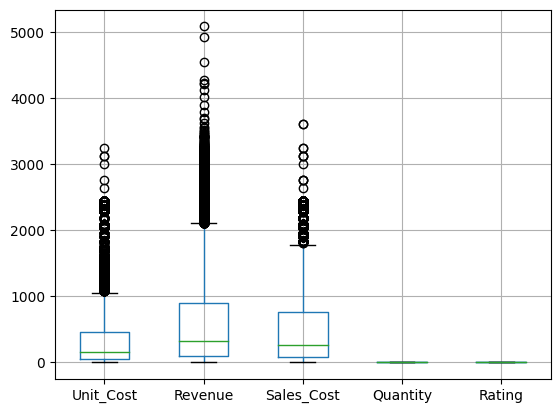

In [15]:
boxplot = data.boxplot(column = ['Unit_Cost','Revenue','Sales_Cost','Quantity', 'Rating'])

Insight : There are outliers in the Unit_Cost, Revenue and Sales_Cost columns. So, we should handle the outliers

##Handle outliers

In [16]:
#Handle oulier for Unit_Cost column
def interquartile(data,x):
  q1 = (data[x]).quantile(0.25)
  q3 = (data[x]).quantile(0.75)
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum


maximum,minimum = interquartile(data,'Unit_Cost')
print('max: ',maximum,' | min:',minimum)

max:  1070.0  | min: -570.0


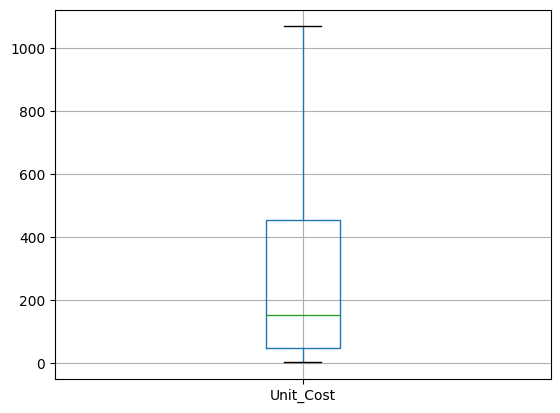

In [17]:
#Replacing outliers
def replace_outliers(data,x,maximum,minimum):
  more_than = (data[x] > maximum)
  less_than = (data[x] < minimum)
  data[x] = data[x].mask(more_than, maximum,axis=0)
  data[x] = data[x].mask(less_than, minimum,axis=0)
  return data


maximum,minimum = interquartile(data,'Unit_Cost')
data = replace_outliers(data,'Unit_Cost',maximum,minimum)
boxplot = data.boxplot(column=['Unit_Cost'])

Insight : Column Unit_Cost no longer has outliers

In [18]:
#Handle oulier for Revenue column
def interquartile(data,x):
  q1 = (data[x]).quantile(0.25)
  q3 = (data[x]).quantile(0.75)
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum


maximum,minimum = interquartile(data,'Revenue')
print('max: ',maximum,' | min:',minimum)

max:  2102.0  | min: -1098.0


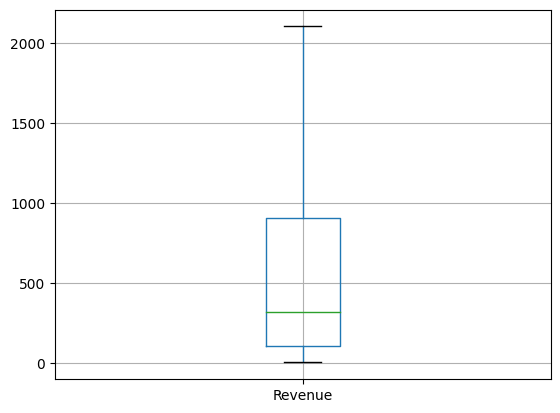

In [19]:
#Replacing outliers
def replace_outliers(data,x,maximum,minimum):
  more_than = (data[x] > maximum)
  less_than = (data[x] < minimum)
  data[x] = data[x].mask(more_than, maximum,axis=0)
  data[x] = data[x].mask(less_than, minimum,axis=0)
  return data

maximum,minimum = interquartile(data,'Revenue')
data = replace_outliers(data,'Revenue',maximum,minimum)
boxplot = data.boxplot(column=['Revenue'])

Insight : Column Revenue no longer has outliers

In [20]:
#Handle oulier for Sales_Cost column
def interquartile(data,x):
  q1 = (data[x]).quantile(0.25)
  q3 = (data[x]).quantile(0.75)
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum


maximum,minimum = interquartile(data,'Sales_Cost')
print('max: ',maximum,' | min:',minimum)

max:  1795.0  | min: -941.0


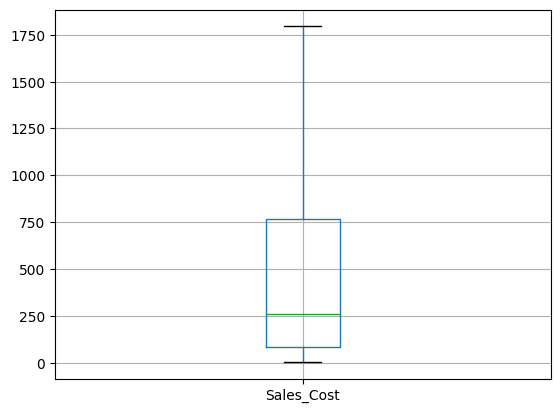

In [21]:
#Replacing outliers
def replace_outliers(data,x,maximum,minimum):
  more_than = (data[x] > maximum)
  less_than = (data[x] < minimum)
  data[x] = data[x].mask(more_than, maximum,axis=0)
  data[x] = data[x].mask(less_than, minimum,axis=0)
  return data

maximum,minimum = interquartile(data,'Sales_Cost')
data = replace_outliers(data,'Sales_Cost',maximum,minimum)
boxplot = data.boxplot(column=['Sales_Cost'])

Insight : Column Sales_Cost no longer has outliers

##Final Data

In [22]:
data

,Date,Time,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Quantity,Unit_Cost,Revenue,Payment,Rating,Month,Sales_Cost,Hour
0,02/19/2016,13:08,2016,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109,Credit Card,6.5,2,80.00,13
1,02/20/2016,10:29,2016,29,F,United States,Washington,Clothing,Gloves,2,24.50,57,Credit Card,5.0,2,49.00,10
2,02/27/2016,13:23,2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,15,Cash,7.5,2,11.01,13
3,12/03/2016,20:33,2016,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,233,Cash,6.5,12,175.00,20
4,12/03/2016,10:37,2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,125,Cash,8.0,12,105.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34848,02/24/2016,13:24,2016,37,M,Germany,Bayern,Bikes,Mountain Bikes,2,384.50,1072,Cash,7.0,2,769.00,13
34849,03/22/2015,18:06,2015,38,M,France,Charente-Maritime,Bikes,Mountain Bikes,1,1070.00,1487,Cash,9.0,3,1795.00,18
34850,03/13/2015,11:42,2015,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,1,1070.00,1583,Cash,9.5,3,1795.00,11
34851,05/04/2015,14:30,2015,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,3,683.00,1682,Cash,7.0,5,1795.00,14


In [23]:
data.to_csv('Fezzari_Sales_Report.csv', index=False)

Insight : This is the final data that will be used for analysis

# 4. Analisis dan perhitungan

##No.1

In [25]:
#Calculate quantity of product category
selling_product = pd.DataFrame(df.groupby('Product_Category').sum()['Quantity'])
selling_product .sort_values(by=['Quantity'], inplace=True, ascending=False)
selling_product [:10]

<ipython-input-25-9fe650c17bd0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  selling_product = pd.DataFrame(df.groupby('Product_Category').sum()['Quantity'])


,Quantity
Product_Category,
Accessories,45030
Bikes,14286
Clothing,10477


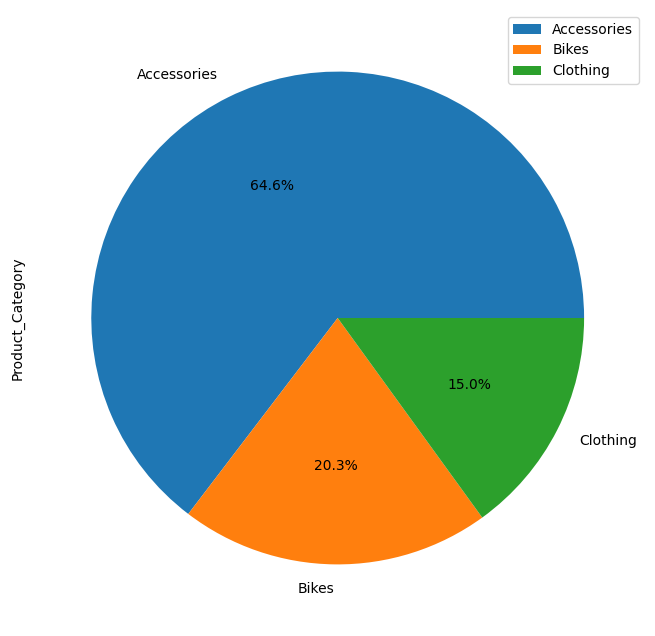

In [27]:
#Make a pie chart to visualize selling product
category_selling=df['Product_Category'].value_counts()
category_selling.plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

Insight : Based on the pie chart, can be concluded that the product that sells the most is Accesories.

In [28]:
#Calculate quantity of product subcategory
best_selling = pd.DataFrame(df.groupby('Sub_Category').sum()['Quantity'])
best_selling .sort_values(by=['Quantity'], inplace=True, ascending=False)
best_selling [:10]

<ipython-input-28-55c119a3808a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_selling = pd.DataFrame(df.groupby('Sub_Category').sum()['Quantity'])


,Quantity
Sub_Category,
Tires and Tubes,22201
Bottles and Cages,10558
Helmets,8384
Road Bikes,6119
Mountain Bikes,5494
Jerseys,4030
Caps,3020
Touring Bikes,2673
Fenders,1494


<ipython-input-30-41a6f197f577>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = subcategory.sum()['Quantity']


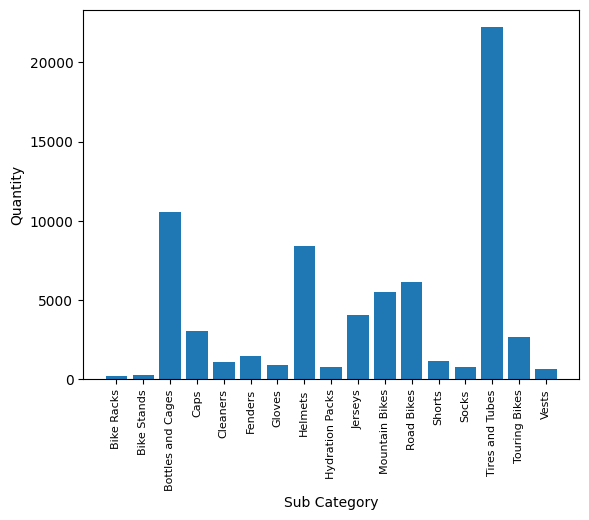

In [30]:
#Make a bar chart to visualize selling of subcategory product
subcategory= data.groupby('Sub_Category')
quantity = subcategory.sum()['Quantity']

keys = [pair for pair, data in subcategory]
plt.bar(keys, quantity)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Quantity')
plt.xlabel('Sub Category')
plt.show()

Insight : Based on the bar chart, can be concluded that the subcategory that sells the most is Tires and Tubes.

## No.2

In [31]:
#Calculate motnh and sales cost to know what month is the best selling
sales =data.groupby('Month').sum()['Sales_Cost'].reset_index()
sales

<ipython-input-31-8916aa5bb85b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales =data.groupby('Month').sum()['Sales_Cost'].reset_index()


,Month,Sales_Cost
0,1,1578172.48
1,2,1473176.89
2,3,1581910.62
3,4,1632630.25
4,5,1834565.17
5,6,1929627.89
6,7,1312551.50
7,8,1319082.77
8,9,1296901.60
9,10,1270458.12


<ipython-input-47-ea9cfb347eb5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,df.groupby(['Month']).sum()['Sales_Cost'], color=['skyblue'])


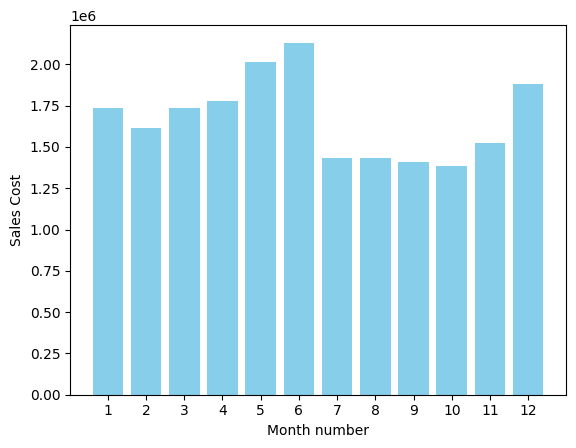

In [47]:
#Visualization of best selling month
months = range(1,13)
plt.bar(months,df.groupby(['Month']).sum()['Sales_Cost'], color=['skyblue'])
plt.xticks(months)
plt.ylabel('Sales Cost')
plt.xlabel('Month number')
plt.show()

Insight : June is the best month for sales with 1929627.89

##No.3

In [33]:
#Calculate country that make more reveneu
profit_state = data.groupby(['Country']).sum()
profit_state.loc[:, 'Revenue'].sort_values(ascending=False)

<ipython-input-33-8a06be4a9035>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_state = data.groupby(['Country']).sum()


Country
United States     10076146
United Kingdom     4089291
Germany            3804950
France             3246027
Name: Revenue, dtype: int64

<Figure size 1000x600 with 0 Axes>

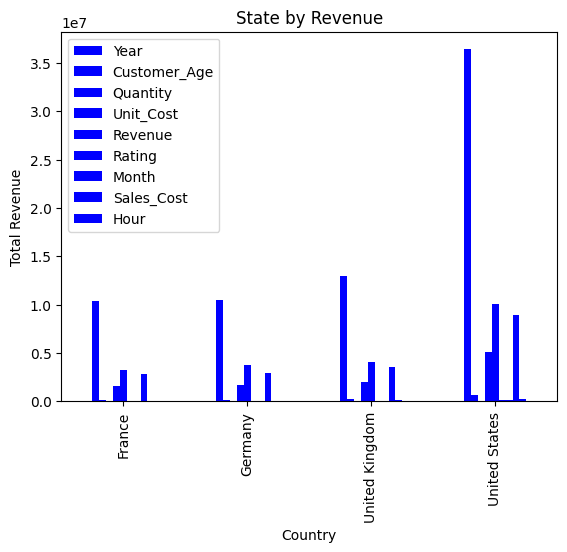

In [34]:
#Display visualization
plt.figure(figsize=(10, 6))
profit_state.plot(kind='bar', color='blue')
plt.title('State by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

Insight : United States  has sold most products with 100.761.46 dollar revenue, while France has the lowest profit.

##No.4

Hypotesa using chi squared

H0: There is no correlation between Gender and payment method (Men and Women are the same).

H1: There is a correlation  between Gender and payment method (Men and Women are different).

In [35]:
#check unique values of column payment
data['Payment'].unique()

array(['Credit Card', 'Cash', 'Ewallet'], dtype=object)

In [36]:
#check unique values of column customer gender
data['Customer_Gender'].unique()

array(['F', 'M'], dtype=object)

In [37]:
#check contingency of column cutomer gender and payment
contingency_table = pd.crosstab(data['Customer_Gender'],data['Payment'])
contingency_table

Payment,Cash,Credit Card,Ewallet
Customer_Gender,,,
F,8198,5721,3133
M,8501,5967,3333


In [38]:
#calculate p-value
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.6818651989898468


Critical value: 0.05

p-val = 0.681 > critical value

H0 accepted

Conclusion:

There is no correlation between gender and payment methods

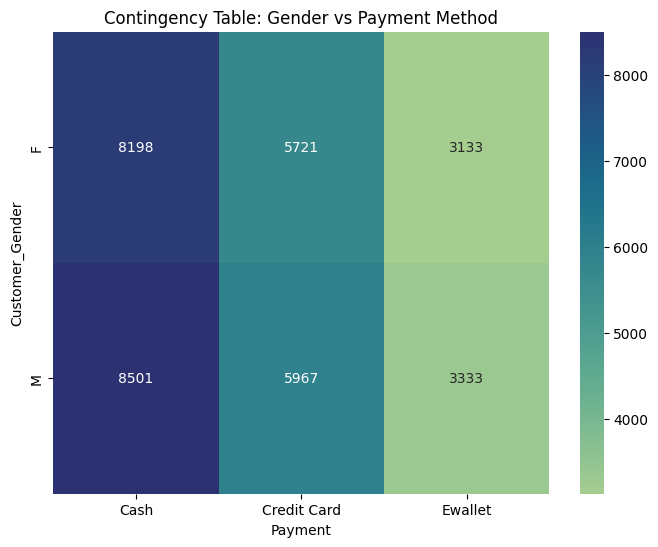

In [39]:
#visualization of gender vs payment method
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='crest', fmt='d')
plt.title('Contingency Table: Gender vs Payment Method')
plt.show()

Insight : Based on the 3 existing payment methods, both Female and Male are interested to pay in Cash.

##No.5

In [40]:
#calculate age of customer with quantity
Age_cust = data.groupby('Customer_Age').sum()['Quantity']
Age_cust = Age_cust[Age_cust == Age_cust.max()]
Age_cust

<ipython-input-40-b3466daa96a1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Age_cust = data.groupby('Customer_Age').sum()['Quantity']


Customer_Age
31    2630
Name: Quantity, dtype: int64

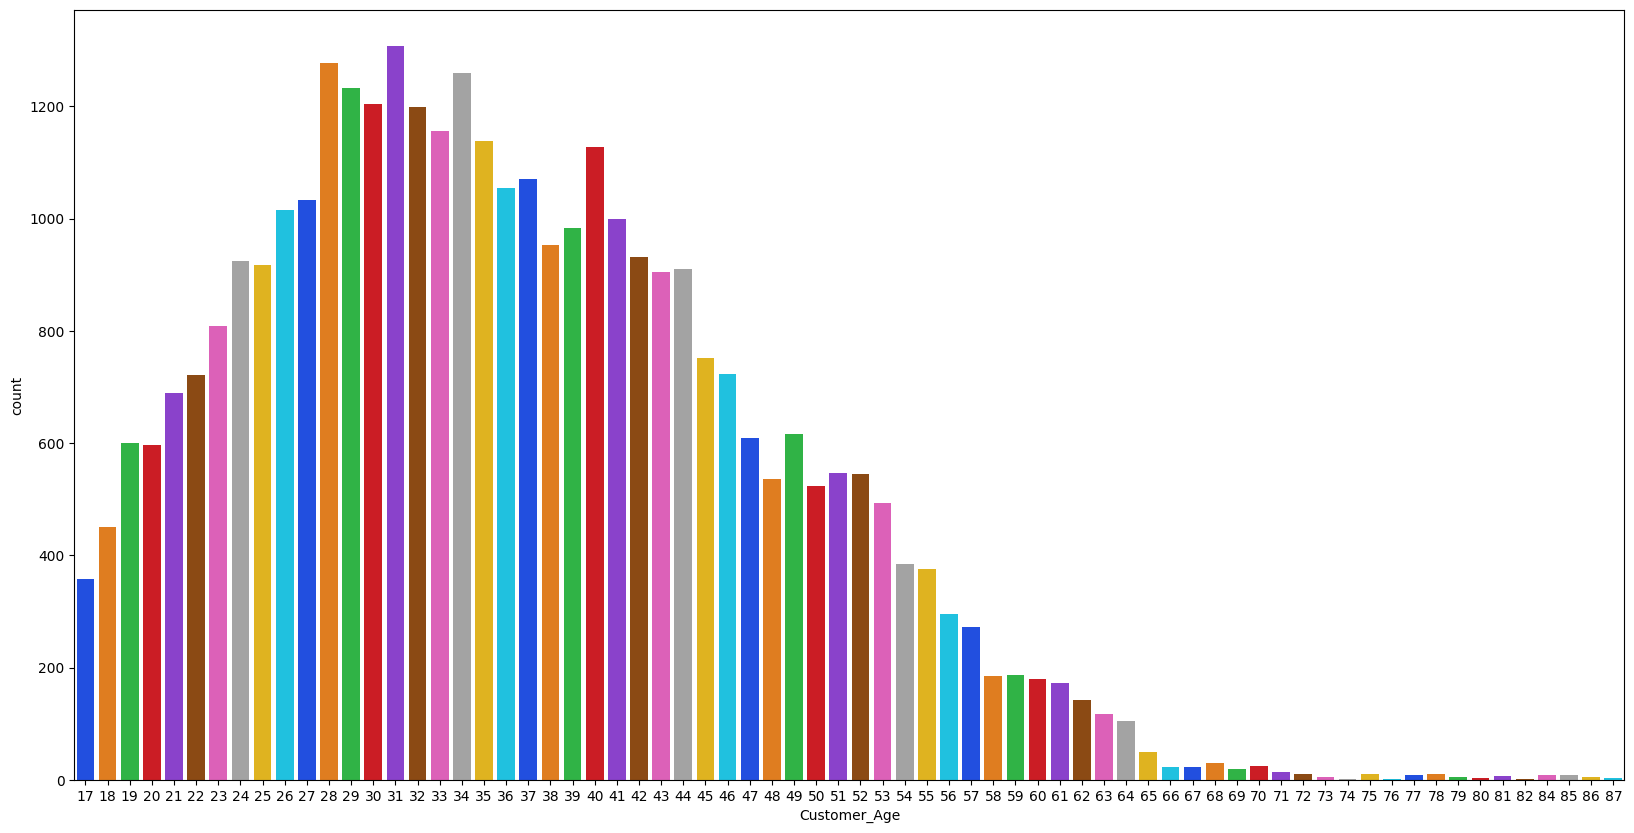

In [41]:
#visualization of age and quantity
plt.figure(figsize=(20, 10))
sns.countplot(x='Customer_Age', data=df, palette="bright")
plt.show()

Insight : People of Age 31 have bought more products of 2630

##No.6

In [42]:
#calculate average of rating
customer_rating = data['Rating'].mean()

print("Mean Customer Rating:", customer_rating)

Mean Customer Rating: 7.491177230080624


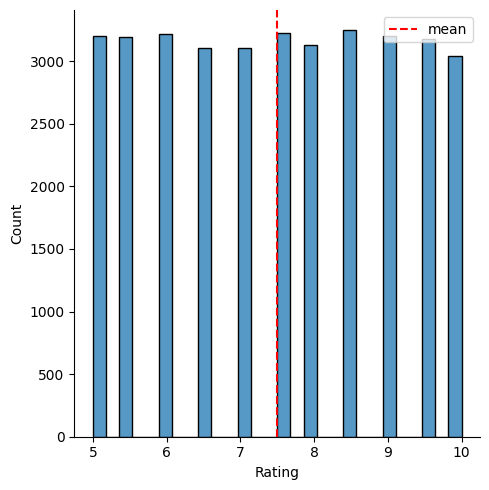

In [43]:
#visualizaton of mean rating
sns.displot(data['Rating'])
plt.axvline(x=np.mean(data['Rating']), c='red', ls='--', label='mean')
plt.legend()

Insight : The red line  indicates that 7.491 is the mean value of customer rating, is generally considered a positive indication. Customers, on average seem to be satisfied with the product.

#Conclusion

The Fezzari bikes sales report reflects a positive sales performance with growth in total sales. Apart from increasing sales, the customer rating is positive indicating overall satisfaction with the products or services. Continuous maintain or improve product quality and customer service will contribute to sustained positive feedback. However, there are opportunities for improvement, especially in country with lower profitability.